Import necessary standard libraries.

In [33]:
from utils import mnist_reader
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

Import libraries for kNN classifier implementation.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

Load fashion data into initial training data and test data.

In [35]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

Split data. First 50,000 datapoints are training data (70% of dataset). Next 10,000 datapoints are validation data (15% of dataset). Last 10,000 datapoints are testing data (15% of dataset).

In [36]:
X_train = X_train.reshape(60000, 28, 28)
X_tr = X_train[:49000]
y_tr = y_train[:49000]

X_val = X_train[49000:59500]
y_val = y_train[49000:59500]

X_test = X_test.reshape(10000, 28, 28)
X_te = np.concatenate((X_train[59500:], X_test), axis=0)
y_te = np.concatenate((y_train[59500:], y_test), axis=0)

Plot first 9 images in training dataset in a 3x3 grid to visualize the images.

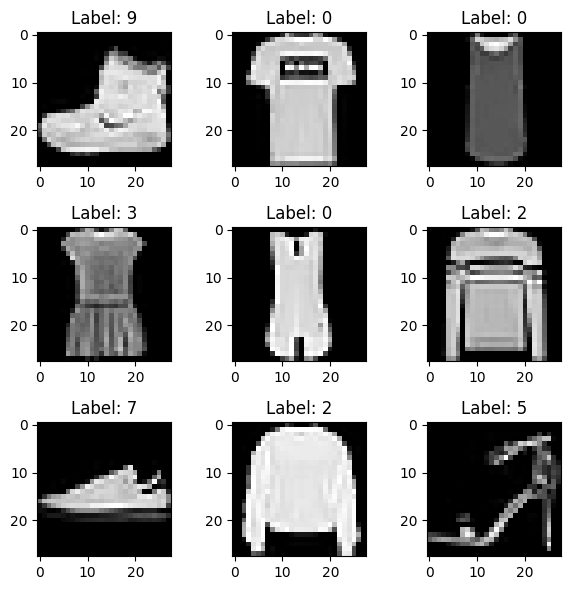

In [37]:
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

figure, axes = plt.subplots(3, 3, figsize=(6, 6))

for i in range(3):
    for j in range(3):
        axes[i, j].imshow(X_tr[i * 3 + j])
        axes[i, j].set_title(f"Label: {y_tr[i * 3 + j]}")

plt.tight_layout()

In [38]:
print(X_tr.shape, X_val.shape, X_te.shape, y_tr.shape, y_val.shape, y_te.shape)

(49000, 28, 28) (10500, 28, 28) (10500, 28, 28) (49000,) (10500,) (10500,)


Fit a kNN classifier on training set with various values of k. Evaluate the accuracy of the classifier on the validation dataset.

Accuracy for k = 1: 0.8480952380952381
Accuracy for k = 2: 0.8466666666666667
Accuracy for k = 3: 0.8522857142857143
Accuracy for k = 4: 0.8538095238095238
Accuracy for k = 5: 0.8514285714285714
Accuracy for k = 6: 0.8534285714285714
Accuracy for k = 7: 0.8523809523809524
Accuracy for k = 8: 0.8537142857142858
Accuracy for k = 9: 0.8517142857142858
Accuracy for k = 10: 0.8499047619047619


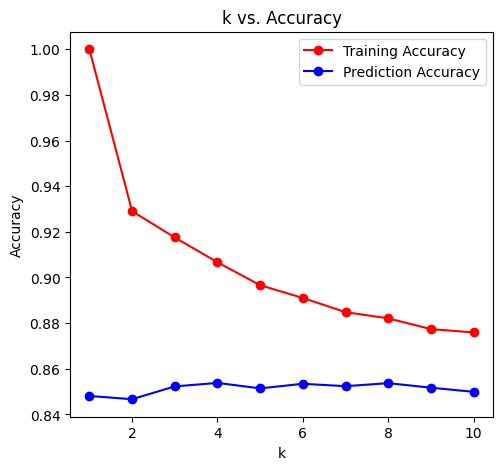

In [61]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

training_accuracies = []
validation_accuracies = []

def kNN_classifier(k):
    X_tr_flattened = X_tr.reshape(X_tr.shape[0], -1)
    X_val_flattened = X_val.reshape(X_val.shape[0], -1)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr_flattened, y_tr)

    training_accuracy = knn.score(X_tr_flattened, y_tr)
    validation_accuracy = knn.score(X_val_flattened, y_val)
    print(f"Accuracy for k = {k}: {validation_accuracy}")
    
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)

for k in k_values:
    kNN_classifier(k)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, training_accuracies, marker='o', color='red', label='Training Accuracy')
plt.plot(k_values, validation_accuracies, marker='o', color='blue', label='Prediction Accuracy')
plt.title('k vs. Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Most accurate k is k = 4 which has an accuracy of 0.8538.

Training time for size = 1000: 0.002235889434814453 seconds
Training accuracy for size = 1000: 0.858
Prediction time for size = 1000: 1.094651699066162 seconds
Prediction accuracy for size = 1000: 0.7522857142857143
Training time for size = 2500: 0.0007989406585693359 seconds
Training accuracy for size = 2500: 0.8676
Prediction time for size = 2500: 1.7664978504180908 seconds
Prediction accuracy for size = 2500: 0.7900952380952381
Training time for size = 5000: 0.0026009082794189453 seconds
Training accuracy for size = 5000: 0.8832
Prediction time for size = 5000: 3.1568760871887207 seconds
Prediction accuracy for size = 5000: 0.8116190476190476
Training time for size = 10000: 0.003957986831665039 seconds
Training accuracy for size = 10000: 0.8862
Prediction time for size = 10000: 6.010653257369995 seconds
Prediction accuracy for size = 10000: 0.8237142857142857
Training time for size = 25000: 0.002492189407348633 seconds
Training accuracy for size = 25000: 0.89684
Prediction time for 

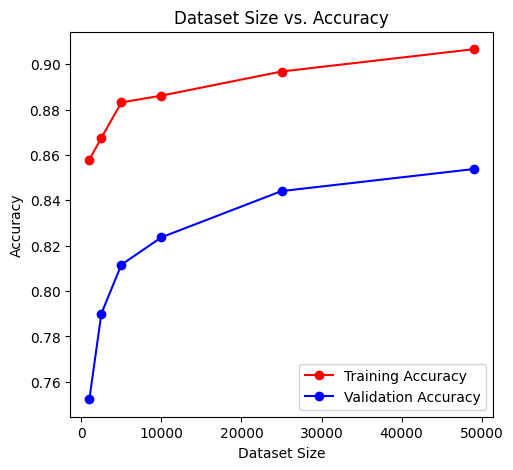

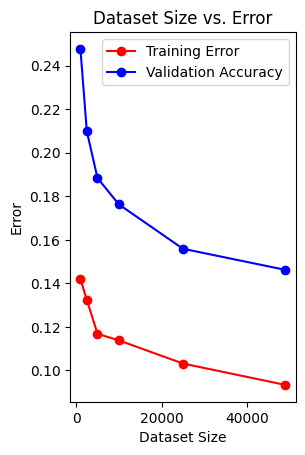

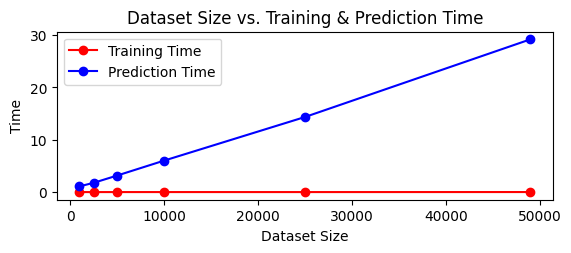

In [54]:
import time

dataset_sizes = [1000, 2500, 5000, 10000, 25000, 49000]

X_tr_flattened = X_tr.reshape(X_tr.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)

k = 4
knn = KNeighborsClassifier(n_neighbors=k)

training_times = []
validation_times = []
training_accuracies = []
validation_accuracies = []
training_errors = []
validation_errors = []

for size in dataset_sizes:
    X_tr_subset = X_tr_flattened[:size]
    y_tr_subset = y_tr[:size]
    start_time_fit = time.time()
    knn.fit(X_tr_subset, y_tr_subset)
    end_time_fit = time.time()
    training_time = end_time_fit - start_time_fit
    print(f"Training time for size = {size}: {training_time} seconds")
    
    training_predictions = knn.predict(X_tr_subset)
    training_accuracy = accuracy_score(y_tr_subset, training_predictions)
    print(f"Training accuracy for size = {size}: {training_accuracy}")
    start_time_predict = time.time()
    validation_predictions = knn.predict(X_val_flattened)
    end_time_predict = time.time()
    predict_time = end_time_predict - start_time_predict
    print(f"Prediction time for size = {size}: {predict_time} seconds")
    validation_accuracy = accuracy_score(y_val, validation_predictions)
    print(f"Prediction accuracy for size = {size}: {validation_accuracy}")
    
    train_error = 1 - training_accuracy
    validation_error = 1 - validation_accuracy
    
    training_times.append(training_time)
    training_accuracies.append(training_accuracy)
    training_errors.append(train_error)
    validation_times.append(predict_time)
    validation_accuracies.append(validation_accuracy)
    validation_errors.append(validation_error)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dataset_sizes, training_accuracies, marker='o', color='red', label='Training Accuracy')
plt.plot(dataset_sizes, validation_accuracies, marker='o', color='blue', label='Validation Accuracy')
plt.title('Dataset Size vs. Accuracy')
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(dataset_sizes, training_errors, marker='o', color='red', label='Training Error')
plt.plot(dataset_sizes, validation_errors, marker='o', color='blue', label='Validation Error')
plt.title('Dataset Size vs. Error')
plt.xlabel('Dataset Size')
plt.ylabel('Error')
plt.legend()
plt.show()

plt.subplot(2, 1, 1)
plt.plot(dataset_sizes, training_times, marker='o', color='red', label='Training Time')
plt.plot(dataset_sizes, validation_times, marker='o', color='blue', label='Prediction Time')
plt.title('Dataset Size vs. Training & Prediction Time')
plt.xlabel('Dataset Size')
plt.ylabel('Time')
plt.legend()
plt.show()

Create a confusion matrix for kNN classifier.

Confusion Matrix:


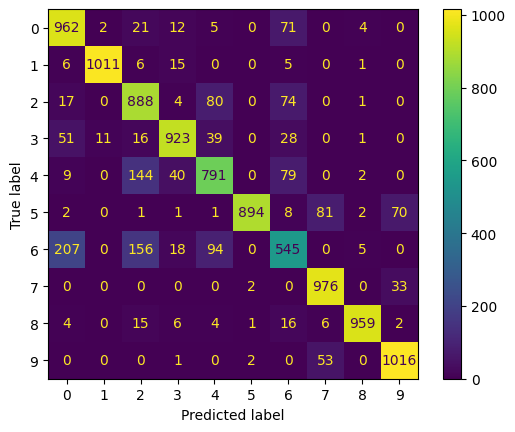

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_tr_flattened, y_tr)
y_pred = knn.predict(X_val_flattened)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Confusion Matrix:")
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_matrix_display.plot()
plt.show()

Import libraries for logistic classifier implementation.

In [56]:
from sklearn.linear_model import LogisticRegression

Fit a logistic classifier on training set. Evaluate the accuracy of the classifier on the validation dataset.

In [57]:
def logistic_classifier(max_iter, solver, multi_class, tolerance):
    X_tr_flattened = X_tr.reshape(X_tr.shape[0], -1)
    X_val_flattened = X_val.reshape(X_val.shape[0], -1)
    
    logreg = LogisticRegression(max_iter=max_iter, solver=solver, multi_class=multi_class, tol=tolerance)
    logreg.fit(X_tr_flattened, y_tr)
    
    accuracy = logreg.score(X_val_flattened, y_val)
    print(f"Accuracy for max_iter={max_iter}, solver={solver}, multi_class={multi_class}, tolerance={tolerance}: {accuracy}")

max_iters = [1000, 2000, 3000]
solvers = ['lbfgs', 'sag', 'newton-cg']
multi_classes = ['multinomial']
tolerances = [1e-4, 1e-8]

In [19]:
logistic_classifier(1000, 'lbfgs', 'multinomial', 1e-4)

Accuracy for max_iter=1000, solver=lbfgs, multi_class=multinomial, tolerance=0.0001: 0.8382857142857143


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
logistic_classifier(1000, 'lbfgs', 'multinomial', 1e-8)

Accuracy for max_iter=1000, solver=lbfgs, multi_class=multinomial, tolerance=1e-08: 0.8382857142857143


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
logistic_classifier(1000, 'sag', 'multinomial', 1e-4)

Accuracy for max_iter=1000, solver=sag, multi_class=multinomial, tolerance=0.0001: 0.84


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
logistic_classifier(1000, 'sag', 'multinomial', 1e-8)

Accuracy for max_iter=1000, solver=sag, multi_class=multinomial, tolerance=1e-08: 0.8400952380952381


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
logistic_classifier(1000, 'newton-cg', 'multinomial', 1e-4)

/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Accuracy for max_iter=1000, solver=newton-cg, multi_class=multinomial, tolerance=0.0001: 0.8344761904761905


In [24]:
logistic_classifier(1000, 'newton-cg', 'multinomial', 1e-8)

Accuracy for max_iter=1000, solver=newton-cg, multi_class=multinomial, tolerance=1e-08: 0.8344761904761905


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [25]:
logistic_classifier(2000, 'lbfgs', 'multinomial', 1e-4)

Accuracy for max_iter=2000, solver=lbfgs, multi_class=multinomial, tolerance=0.0001: 0.8374285714285714


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
logistic_classifier(2000, 'lbfgs', 'multinomial', 1e-8)

Accuracy for max_iter=2000, solver=lbfgs, multi_class=multinomial, tolerance=1e-08: 0.8374285714285714


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
logistic_classifier(2000, 'sag', 'multinomial', 1e-4)

Accuracy for max_iter=2000, solver=sag, multi_class=multinomial, tolerance=0.0001: 0.8385714285714285


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [28]:
logistic_classifier(2000, 'sag', 'multinomial', 1e-8)

Accuracy for max_iter=2000, solver=sag, multi_class=multinomial, tolerance=1e-08: 0.8384761904761905


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
logistic_classifier(2000, 'newton-cg', 'multinomial', 1e-4)

In [ ]:
logistic_classifier(2000, 'newton-cg', 'multinomial', 1e-8)

In [ ]:
logistic_classifier(3000, 'lbfgs', 'multinomial', 1e-4)

In [ ]:
logistic_classifier(3000, 'lbfgs', 'multinomial', 1e-8)

In [ ]:
logistic_classifier(3000, 'sag', 'multinomial', 1e-4)

In [ ]:
logistic_classifier(3000, 'sag', 'multinomial', 1e-8)

In [ ]:
logistic_classifier(3000, 'newton-cg', 'multinomial', 1e-4)

In [ ]:
logistic_classifier(3000, 'newton-cg', 'multinomial', 1e-8)

Most accurate logistic classifier has parameters max_iter = 1000, solver = sag, multi_class = multinomial, tolerance = 1e-8 which has an accuracy of 0.8401.

/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training time for size = 1000: 50.39037585258484 seconds
Training accuracy for size = 1000: 1.0
Prediction time for size = 1000: 0.13966608047485352 seconds
Prediction accuracy for size = 1000: 0.7845714285714286


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training time for size = 2500: 136.5272979736328 seconds
Training accuracy for size = 2500: 1.0
Prediction time for size = 2500: 0.11938881874084473 seconds
Prediction accuracy for size = 2500: 0.7864761904761904


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training time for size = 5000: 226.62907528877258 seconds
Training accuracy for size = 5000: 0.9938
Prediction time for size = 5000: 0.03414797782897949 seconds
Prediction accuracy for size = 5000: 0.7860952380952381


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training time for size = 10000: 447.73533511161804 seconds
Training accuracy for size = 10000: 0.9598
Prediction time for size = 10000: 0.03482699394226074 seconds
Prediction accuracy for size = 10000: 0.7961904761904762


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training time for size = 25000: 1066.5257632732391 seconds
Training accuracy for size = 25000: 0.90844
Prediction time for size = 25000: 0.07237005233764648 seconds
Prediction accuracy for size = 25000: 0.8245714285714286


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training time for size = 49000: 1851.81476521492 seconds
Training accuracy for size = 49000: 0.8860204081632653
Prediction time for size = 49000: 0.0793008804321289 seconds
Prediction accuracy for size = 49000: 0.8400952380952381


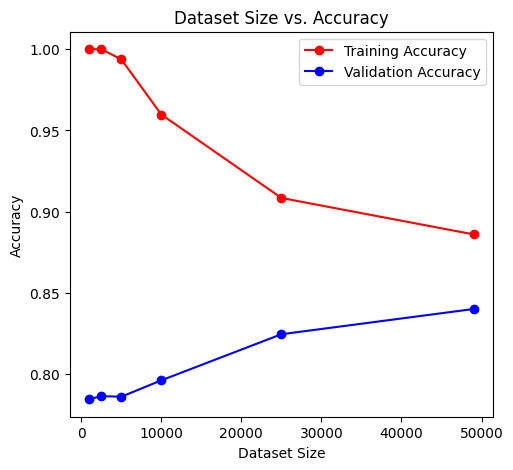

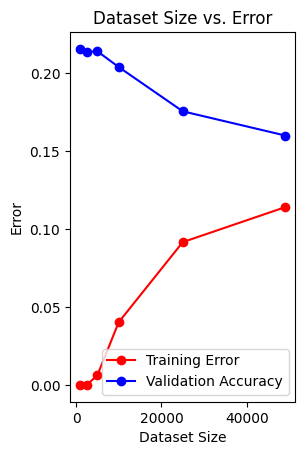

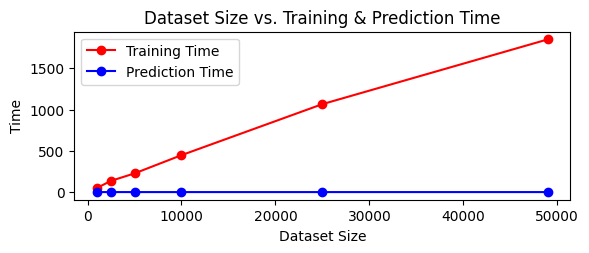

In [30]:
import time

dataset_sizes = [1000, 2500, 5000, 10000, 25000, 49000]

X_tr_flattened = X_tr.reshape(X_tr.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)

max_iter = 1000
solver = 'sag'
multi_class = 'multinomial'
tolerance = 1e-8
logreg = LogisticRegression(max_iter=max_iter, solver=solver, multi_class=multi_class, tol=tolerance)

training_times = []
validation_times = []
training_accuracies = []
validation_accuracies = []
training_errors = []
validation_errors = []

for size in dataset_sizes:
    X_tr_subset = X_tr_flattened[:size]
    y_tr_subset = y_tr[:size]
    start_time_fit = time.time()
    logreg.fit(X_tr_subset, y_tr_subset)
    end_time_fit = time.time()
    training_time = end_time_fit - start_time_fit
    print(f"Training time for size = {size}: {training_time} seconds")
    
    training_predictions = logreg.predict(X_tr_subset)
    training_accuracy = accuracy_score(y_tr_subset, training_predictions)
    print(f"Training accuracy for size = {size}: {training_accuracy}")
    start_time_predict = time.time()
    validation_predictions = logreg.predict(X_val_flattened)
    end_time_predict = time.time()
    predict_time = end_time_predict - start_time_predict
    print(f"Prediction time for size = {size}: {predict_time} seconds")
    validation_accuracy = accuracy_score(y_val, validation_predictions)
    print(f"Prediction accuracy for size = {size}: {validation_accuracy}")
    
    train_error = 1 - training_accuracy
    validation_error = 1 - validation_accuracy
    
    training_times.append(training_time)
    training_accuracies.append(training_accuracy)
    training_errors.append(train_error)
    validation_times.append(predict_time)
    validation_accuracies.append(validation_accuracy)
    validation_errors.append(validation_error)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dataset_sizes, training_accuracies, marker='o', color='red', label='Training Accuracy')
plt.plot(dataset_sizes, validation_accuracies, marker='o', color='blue', label='Validation Accuracy')
plt.title('Dataset Size vs. Accuracy')
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(dataset_sizes, training_errors, marker='o', color='red', label='Training Error')
plt.plot(dataset_sizes, validation_errors, marker='o', color='blue', label='Validation Accuracy')
plt.title('Dataset Size vs. Error')
plt.xlabel('Dataset Size')
plt.ylabel('Error')
plt.legend()
plt.show()

plt.subplot(2, 1, 1)
plt.plot(dataset_sizes, training_times, marker='o', color='red', label='Training Time')
plt.plot(dataset_sizes, validation_times, marker='o', color='blue', label='Prediction Time')
plt.title('Dataset Size vs. Training & Prediction Time')
plt.xlabel('Dataset Size')
plt.ylabel('Time')
plt.legend()
plt.show()

The ideal dataset size is 49000.

Create a confusion matrix for logistic classifier.

/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Confusion Matrix:


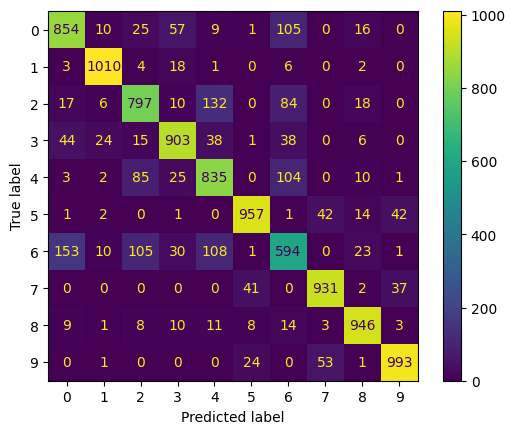

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

size = 49000
X_tr_subset = X_tr_flattened[:size]
y_tr_subset = y_tr[:size]
logreg.fit(X_tr_subset, y_tr_subset)
y_pred = logreg.predict(X_val_flattened)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Confusion Matrix:")
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_matrix_display.plot()
plt.show()

Import libraries for neural network classifier implementation.

In [6]:
from sklearn.neural_network import MLPClassifier

seed = 1234
np.random.seed(seed)

Fit a neural network on training set. Evaluate the accuracy of the classifier on validation set.

In [7]:
def neural_network_classifier(hidden_layer_size, activation_function, solver, alpha, batch_size):
    X_tr_flattened = X_tr.reshape(X_tr.shape[0], -1)
    X_val_flattened = X_val.reshape(X_val.shape[0], -1)
    
    nnc = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation_function, solver=solver, learning_rate_init=alpha, batch_size=batch_size, random_state=seed)
    nnc.fit(X_tr_flattened, y_tr)
    
    accuracy = nnc.score(X_val_flattened, y_val)
    print(f"Accuracy for hidden_layer_size={hidden_layer_size}, activation_function={activation_function}, solver={solver}, alpha={alpha}, batch_size={batch_size}: {accuracy}")

hidden_layer_sizes = [(100, ), (128, )]
activation_functions = ['tanh', 'relu']
solvers = ['sgd']
alphas = [0.001, 0.01]
batch_sizes = [128, 256]

In [8]:
neural_network_classifier((100, ), 'tanh', 'sgd', 0.001, 128)

Accuracy for hidden_layer_size=(100,), activation_function=tanh, solver=sgd, alpha=0.001, batch_size=128: 0.7585714285714286


In [9]:
neural_network_classifier((100, ), 'tanh', 'sgd', 0.001, 256)

Accuracy for hidden_layer_size=(100,), activation_function=tanh, solver=sgd, alpha=0.001, batch_size=256: 0.8074285714285714


In [10]:
neural_network_classifier((100, ), 'tanh', 'sgd', 0.01, 128)

Accuracy for hidden_layer_size=(100,), activation_function=tanh, solver=sgd, alpha=0.01, batch_size=128: 0.2884761904761905


In [11]:
neural_network_classifier((100, ), 'tanh', 'sgd', 0.01, 256)

Accuracy for hidden_layer_size=(100,), activation_function=tanh, solver=sgd, alpha=0.01, batch_size=256: 0.5496190476190477


In [16]:
neural_network_classifier((100, ), 'relu', 'sgd', 0.001, 128)

Accuracy for hidden_layer_size=(100,), activation_function=relu, solver=sgd, alpha=0.001, batch_size=128: 0.5799047619047619


In [17]:
neural_network_classifier((100, ), 'relu', 'sgd', 0.001, 256)

Accuracy for hidden_layer_size=(100,), activation_function=relu, solver=sgd, alpha=0.001, batch_size=256: 0.8064761904761905


In [18]:
neural_network_classifier((100, ), 'relu', 'sgd', 0.01, 128)

Accuracy for hidden_layer_size=(100,), activation_function=relu, solver=sgd, alpha=0.01, batch_size=128: 0.09761904761904762


In [20]:
neural_network_classifier((100, ), 'relu', 'sgd', 0.01, 256)

Accuracy for hidden_layer_size=(100,), activation_function=relu, solver=sgd, alpha=0.01, batch_size=256: 0.09647619047619048


In [21]:
neural_network_classifier((128, ), 'tanh', 'sgd', 0.001, 128)

Accuracy for hidden_layer_size=(128,), activation_function=tanh, solver=sgd, alpha=0.001, batch_size=128: 0.7714285714285715


In [22]:
neural_network_classifier((128, ), 'tanh', 'sgd', 0.001, 256)

Accuracy for hidden_layer_size=(128,), activation_function=tanh, solver=sgd, alpha=0.001, batch_size=256: 0.8047619047619048


In [23]:
neural_network_classifier((128, ), 'tanh', 'sgd', 0.01, 128)

Accuracy for hidden_layer_size=(128,), activation_function=tanh, solver=sgd, alpha=0.01, batch_size=128: 0.44733333333333336


In [24]:
neural_network_classifier((128, ), 'tanh', 'sgd', 0.01, 256)

Accuracy for hidden_layer_size=(128,), activation_function=tanh, solver=sgd, alpha=0.01, batch_size=256: 0.5961904761904762


In [25]:
neural_network_classifier((128, ), 'relu', 'sgd', 0.001, 128)

Accuracy for hidden_layer_size=(128,), activation_function=relu, solver=sgd, alpha=0.001, batch_size=128: 0.5479047619047619


In [26]:
neural_network_classifier((128, ), 'relu', 'sgd', 0.001, 256)

Accuracy for hidden_layer_size=(128,), activation_function=relu, solver=sgd, alpha=0.001, batch_size=256: 0.8202857142857143


In [27]:
neural_network_classifier((128, ), 'relu', 'sgd', 0.01, 128)

Accuracy for hidden_layer_size=(128,), activation_function=relu, solver=sgd, alpha=0.01, batch_size=128: 0.09647619047619048


In [28]:
neural_network_classifier((128, ), 'relu', 'sgd', 0.01, 256)

Accuracy for hidden_layer_size=(128,), activation_function=relu, solver=sgd, alpha=0.01, batch_size=256: 0.09647619047619048


Most accurate neural network classifier has parameters hidden_layer_size = 128, activation_function = relu, solver = sgd, learning_rate_init = 0.001, batch_size = 256.

Training time for size = 1000: 2.8425168991088867 seconds
Training accuracy for size = 1000: 0.474
Prediction time for size = 1000: 0.09527587890625 seconds
Prediction accuracy for size = 1000: 0.4322857142857143
Training time for size = 2500: 2.163586139678955 seconds
Training accuracy for size = 2500: 0.3808
Prediction time for size = 2500: 0.06148123741149902 seconds
Prediction accuracy for size = 2500: 0.3434285714285714


/Users/rohanmistry/Library/CloudStorage/OneDrive-Personal/Rohan's Stuff/School/College/Junior Year/Winter Quarter 2024/COMPSCI 178/fashion-mnist/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training time for size = 5000: 24.71792221069336 seconds
Training accuracy for size = 5000: 0.7818
Prediction time for size = 5000: 0.1369180679321289 seconds
Prediction accuracy for size = 5000: 0.7011428571428572
Training time for size = 10000: 26.350558042526245 seconds
Training accuracy for size = 10000: 0.6591
Prediction time for size = 10000: 0.06895804405212402 seconds
Prediction accuracy for size = 10000: 0.6130476190476191
Training time for size = 25000: 28.154791355133057 seconds
Training accuracy for size = 25000: 0.48268
Prediction time for size = 25000: 0.10504698753356934 seconds
Prediction accuracy for size = 25000: 0.4617142857142857
Training time for size = 49000: 149.57958793640137 seconds
Training accuracy for size = 49000: 0.8176326530612245
Prediction time for size = 49000: 0.09450173377990723 seconds
Prediction accuracy for size = 49000: 0.7839047619047619


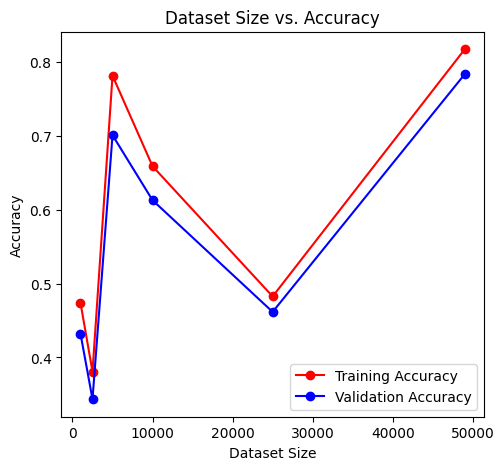

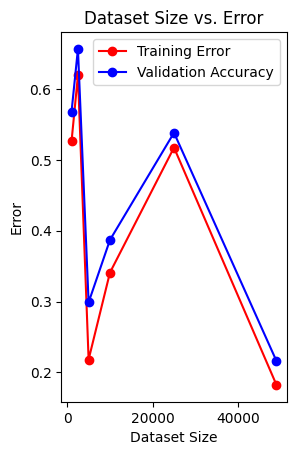

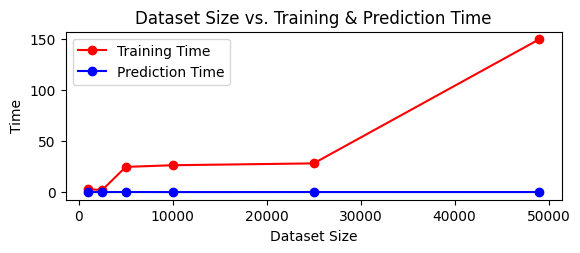

In [29]:
import time

dataset_sizes = [1000, 2500, 5000, 10000, 25000, 49000]

X_tr_flattened = X_tr.reshape(X_tr.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)

hidden_layer_size = 128
activation_function = 'relu'
solver = 'sgd'
learning_rate_init = 0.001
batch_size = 256
nnc = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation_function, solver=solver, learning_rate_init=learning_rate_init, batch_size=batch_size, random_state=seed)

training_times = []
validation_times = []
training_accuracies = []
validation_accuracies = []
training_errors = []
validation_errors = []

for size in dataset_sizes:
    X_tr_subset = X_tr_flattened[:size]
    y_tr_subset = y_tr[:size]
    start_time_fit = time.time()
    nnc.fit(X_tr_subset, y_tr_subset)
    end_time_fit = time.time()
    training_time = end_time_fit - start_time_fit
    print(f"Training time for size = {size}: {training_time} seconds")
    
    training_predictions = nnc.predict(X_tr_subset)
    training_accuracy = accuracy_score(y_tr_subset, training_predictions)
    print(f"Training accuracy for size = {size}: {training_accuracy}")
    start_time_predict = time.time()
    validation_predictions = nnc.predict(X_val_flattened)
    end_time_predict = time.time()
    predict_time = end_time_predict - start_time_predict
    print(f"Prediction time for size = {size}: {predict_time} seconds")
    validation_accuracy = accuracy_score(y_val, validation_predictions)
    print(f"Prediction accuracy for size = {size}: {validation_accuracy}")
    
    train_error = 1 - training_accuracy
    validation_error = 1 - validation_accuracy
    
    training_times.append(training_time)
    training_accuracies.append(training_accuracy)
    training_errors.append(train_error)
    validation_times.append(predict_time)
    validation_accuracies.append(validation_accuracy)
    validation_errors.append(validation_error)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dataset_sizes, training_accuracies, marker='o', color='red', label='Training Accuracy')
plt.plot(dataset_sizes, validation_accuracies, marker='o', color='blue', label='Validation Accuracy')
plt.title('Dataset Size vs. Accuracy')
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(dataset_sizes, training_errors, marker='o', color='red', label='Training Error')
plt.plot(dataset_sizes, validation_errors, marker='o', color='blue', label='Validation Accuracy')
plt.title('Dataset Size vs. Error')
plt.xlabel('Dataset Size')
plt.ylabel('Error')
plt.legend()
plt.show()

plt.subplot(2, 1, 1)
plt.plot(dataset_sizes, training_times, marker='o', color='red', label='Training Time')
plt.plot(dataset_sizes, validation_times, marker='o', color='blue', label='Prediction Time')
plt.title('Dataset Size vs. Training & Prediction Time')
plt.xlabel('Dataset Size')
plt.ylabel('Time')
plt.legend()
plt.show()

The ideal dataset size is 49000.

Create a confusion matrix for neural network classifier.

Confusion Matrix:


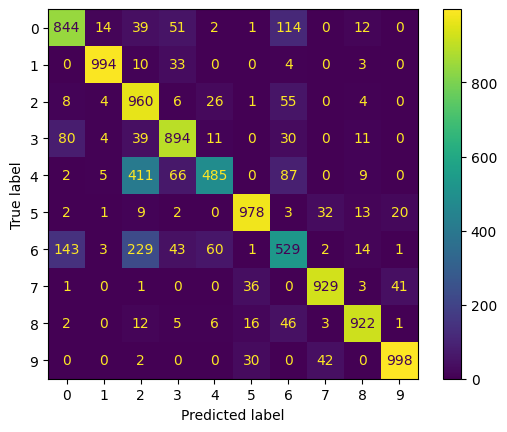

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

size = 49000
X_tr_subset = X_tr_flattened[:size]
y_tr_subset = y_tr[:size]
nnc.fit(X_tr_subset, y_tr_subset)
y_pred = nnc.predict(X_val_flattened)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Confusion Matrix:")
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_matrix_display.plot()
plt.show()